# Table of Contents

## 1. [Introduction](#Introdution)
## 2. [Description of the data](#Description-of-the-data)
## 3. [Discussion of the missing data](#Discussion-of-the-missing-data)
## 4. [Exploratory visualizations and/or summary tables](#Exploratory-visualizations-and/or-summary-tables)
## 5. [Results section](#Results-section)

# Introduction

#### In the realm of financial services, extending credit to individuals represents a significant opportunity as well as a considerable risk. The Home Credit Default Risk competition, hosted by Kaggle, underscores a critical challenge in this sector: the prediction of an applicant's ability to repay a loan. This project aims to leverage data science and machine learning methodologies to predict default risks accurately, thereby enabling lenders to make informed decisions.
#### The primary goal of this project is to develop an understanding of the data present which will lead to a model that can identify potential defaulters with high accuracy. This involves analyzing a wide array of data provided by Home Credit, a service focused on broadening financial inclusion for the unbanked population. The dataset includes various features from application records (application_{train|test}.csv) and transactional information (e.g., bureau.csv, previous_application.csv), offering a rich foundation for analysis.
#### The purpose of this notebook is to thoroughly investigate the datasets provided, with a focus on understanding the target variable's distribution, identifying potential predictors, and assessing data quality and integrity. Key questions that will guide the exploration include:
* Is the target variable, indicating loan repayment difficulties, unbalanced, and what implications does this have for model accuracy and validation strategies?
* What relationships exist between the target and predictor variables, and how can these insights inform feature selection and engineering for the predictive model?
* How prevalent is missing data within the application records, and what strategies should be employed for data imputation or omission to preserve analytical integrity?
* Are there any anomalies or outliers in the data that could impact model performance, and how should they be addressed?
* Considering the nature of the data and the requirements of various predictive modeling techniques, what data transformations may be necessary to optimize model input?

#### By addressing these questions, this EDA seeks to establish a foundation for the following development of a robust predictive model. This model will not only enhance the ability of financial institutions to extend credit more responsibly but also contribute to the broader goal of financial inclusion by identifying creditworthy individuals previously overlooked by traditional credit systems.

# **Description of the data**

**Data Composition:** The dataset encompasses seven sources, all in CSV format, detailing various aspects of loan applications and client credit history:

1. **application_train/application_test:** These files constitute the primary dataset, containing records of loan applications at Home Credit. Each row represents a unique loan application, identified by `SK_ID_CURR`. The training data includes a `TARGET` feature indicating loan repayment status (0: no payment problems, 1: payment problems).

2. **bureau:** This dataset provides information on the client's previous credits from other financial institutions, with each row representing a distinct previous credit. A single loan in the application data may be associated with multiple entries here.

3. **bureau_balance:** Offers monthly details on previous credits listed in the bureau data. Each row corresponds to a month of credit, with multiple rows per credit reflecting its duration.

4. **previous_application:** Contains data on prior loan applications at Home Credit by clients with current loans in the application data. Each row represents a previous application, identified by `SK_ID_PREV`, with the potential for multiple entries per current loan.

5. **POS_CASH_BALANCE:** Presents monthly information on past point of sale or cash loans with Home Credit. Each entry covers a month of loan, with multiple entries per loan.

6. **credit_card_balance:** Monthly data on previous credit cards held with Home Credit. Similar to other datasets, each row accounts for a month's balance, with multiple rows per credit card.

7. **installments_payments:** Tracks payment history for past loans at Home Credit, including both made and missed payments. Each payment instance is recorded in a separate row.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

# Warnings Management
import warnings  # To suppress warnings which can clutter the notebook
warnings.filterwarnings('ignore')

### Load data

In [2]:
# Load train data
train = pd.read_csv('application_train.csv')
print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Load test data
test = pd.read_csv('application_test.csv')
print(test.shape)
test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Load bureau data
bureau = pd.read_csv('bureau.csv')
print(bureau.shape)
bureau.head(20)

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [5]:
# Load previous application data
prev_app = pd.read_csv('previous_application.csv')
print(prev_app.shape)
prev_app.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Discussion of the missing data 

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Calculate total missing values
    mis_val = df.isnull().sum()
    
    # Calculate percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending, after excluding columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print(f"Your selected dataframe has {df.shape[1]} columns.\n"
          f"There are {mis_val_table_ren_columns.shape[0]} columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns 

In [7]:
# Function to calculate missing values by row
def missing_values_table_by_row(df):
    # Calculate total missing values per row
    mis_val = df.isnull().sum(axis=1)
    
    # Calculate percentage of missing values per row
    mis_val_percent = 100 * mis_val / len(df.columns)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print(f"Your selected dataframe has {df.shape[0]} rows.\n"
          f"There are {mis_val_table_ren_columns.shape[0]} rows that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
# train data by column
missing_values = missing_values_table(train)
print(missing_values.head())
print(f"\nAverage % missing data in entire dataset: {missing_values['% of Total Values'].mean()}")

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
                          Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4

Average % missing data in entire dataset: 44.41940298507463


In [9]:
# train data by row
missing_values = missing_values_table_by_row(train)
print(missing_values.head())
print(f"\nAverage % missing data in entire dataset: {missing_values['% of Total Values'].mean()}")

Your selected dataframe has 307511 rows.
There are 298909 rows that have missing values.
        Missing Values  % of Total Values
69707               61               50.0
269492              61               50.0
269786              61               50.0
185713              61               50.0
133770              61               50.0

Average % missing data in entire dataset: 25.095737164153633


In [10]:
# test data by column
missing_values = missing_values_table(test)
print(missing_values.head())
print(f"\nAverage % missing data in entire dataset: {missing_values['% of Total Values'].mean()}")

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.
                          Missing Values  % of Total Values
COMMONAREA_MODE                    33495               68.7
COMMONAREA_MEDI                    33495               68.7
COMMONAREA_AVG                     33495               68.7
NONLIVINGAPARTMENTS_MEDI           33347               68.4
NONLIVINGAPARTMENTS_AVG            33347               68.4

Average % missing data in entire dataset: 45.01875


In [11]:
# test data by row
missing_values = missing_values_table_by_row(test)
print(missing_values.head())
print(f"\nAverage % missing data in entire dataset: {missing_values['% of Total Values'].mean()}")

Your selected dataframe has 48744 rows.
There are 47005 rows that have missing values.
       Missing Values  % of Total Values
45915              61               50.4
11311              58               47.9
9149               58               47.9
46262              58               47.9
43634              58               47.9

Average % missing data in entire dataset: 24.695274970747796


### Discussion

There is extensive amounts of missing data in both the train and test datasets. To resolve this issue we rely primarily on 3 standard solutions; Removing rows, Removing columns, and Imputing.

When it comes to removing rows, this is useful if only a few rows have a high percentage of missing values. However, we have lots of rows with some sort of missing data in their row. The training data has on average 45% missing data in each row, while the test dataset has on average 24% missing data in each row. My rationale for removing rows shall be to remove rows that are 50% and above in the train dataset and above 45% in the test dataset. This way, rows with majority or near majority empty columns are no longer considered in the dataset

When it comes to removing columns, we see that there is lots amount of data that is missing still. Columns that contain large amounts of missing data inhibit or predictive abilities of our model due to the limited information that they provide. We see that in the train dataset that columns on average have 44% missing data and the test dataset columns have 45% missing data. My rationale for removing the columns is to remove columns with over 65% missing data in the train set and test set.

Finally, when it comes to imputing data, this adds complexity to the problems of removing columns and rows. However, I believe that after removing rows and columns with a large majority of missing data, imputing data will make more sense as imputing on data where nearly all of it is missing will in most cases lead to poor imputation. Therefore we will impute after we have removed missing data.

In [12]:
def drop_columns(df, threshold=.65, exempt_columns=['TARGET']):
    # Calculate the proportion of missing values
    missing = df.isna().sum() / len(df)
    # Determine columns to drop based on threshold, excluding exempt columns
    columns_to_drop = [col for col in missing[missing > threshold].index if col not in exempt_columns]
    # Drop the columns
    df_cleaned = df.drop(columns=columns_to_drop)
    return df_cleaned

In [13]:
def drop_rows(df, threshold):
    # Calculate the proportion of missing data per row
    missing_proportion = df.isna().sum(axis=1) / len(df.columns)
    
    # Identify rows that exceed the missing data threshold
    rows_to_drop = missing_proportion[missing_proportion > threshold].index
    
    # Drop the rows from the DataFrame
    df_cleaned = df.drop(index=rows_to_drop)
    
    return df_cleaned

In [14]:
# Removing columns & rows from train data
values = train.isna().sum() / len(train)## Checking for the percent of missing values in each column
values.sort_values(ascending=False)

train = drop_columns(train)
train = drop_rows(train, .50)

In [15]:
# Removing columns & rows from test data
values = test.isna().sum() / len(test)
values.sort_values(ascending=False)

test = drop_columns(test)
test = drop_rows(test, .45)

In [16]:
# Identify numeric and categorical columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Define transformers
numeric_transformer = IterativeImputer(max_iter=10, random_state=0)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the train data
train_transformed = preprocessor.fit_transform(train)

new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine all feature names (numeric features remain unchanged, categorical features are expanded)
new_columns = list(numeric_columns) + list(new_categorical_features)

# Convert the numpy array back to a DataFrame
train = pd.DataFrame(train_transformed, columns=new_columns)

In [17]:
# Identify numeric and categorical columns
numeric_columns = test.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = test.select_dtypes(include=['object']).columns

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the train data
test_transformed = preprocessor.fit_transform(test)

new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine all feature names (numeric features remain unchanged, categorical features are expanded)
new_columns = list(numeric_columns) + list(new_categorical_features)

# Convert the numpy array back to a DataFrame
test = pd.DataFrame(test_transformed, columns=new_columns)

### Merging the data

In [18]:
# Merge test with train

columns_to_use_from_test = [col for col in test.columns if col not in train.columns] + ['SK_ID_CURR']
app = pd.merge(train, test[columns_to_use_from_test], on='SK_ID_CURR', how='left')

In [19]:
# Aggregate bureau data and then merge

agg_bureau = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM_DEBT': 'sum',  # Total debt
    'AMT_CREDIT_SUM': 'sum', # Total Credit
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),  # Count of active loans
    'AMT_CREDIT_MAX_OVERDUE': 'max',  # Maximum overdue
    'DAYS_CREDIT': ['count', 'mean']  # Number of bureau entries and average days past
}).reset_index()

# Flatten the MultiIndex in columns created by agg
agg_bureau.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in agg_bureau.columns]
agg_bureau.rename(columns={'SK_ID_CURR_': 'SK_ID_CURR'}, inplace=True)

# Merge aggregated bureau data with application data
app = pd.merge(app, agg_bureau, on='SK_ID_CURR', how='left')

In [20]:
# Aggregate previous application data and then merge
agg_prev = prev_app.groupby('SK_ID_CURR').agg({
    'AMT_ANNUITY': 'mean',  # Average of the annuity amounts
    'AMT_APPLICATION': 'sum',  # Sum of application amounts
    'AMT_CREDIT': 'sum',  # Sum of credit amounts
    'AMT_DOWN_PAYMENT': 'sum',  # Sum of down payments
    'AMT_GOODS_PRICE': 'mean',  # Average goods price
    'CNT_PAYMENT': 'mean',  # Average count of payment terms
}).reset_index()

agg_prev.rename(columns={'AMT_ANNUITY': 'AMT_ANNUITY_PREV'}, inplace=True)

app = pd.merge(app, agg_prev, on='SK_ID_CURR', how='left')

In [21]:
print(app.shape)
app.head()

(307511, 243)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CREDIT_ACTIVE_<lambda>,AMT_CREDIT_MAX_OVERDUE_max,DAYS_CREDIT_count,DAYS_CREDIT_mean,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,CNT_PAYMENT
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,2.0,5043.645,8.0,-874.00,9251.775,179055.00,179055.0,0.00,179055.00,24.000000
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,1.0,0.000,4.0,-1400.75,56553.990,1306309.50,1452573.0,6885.00,435436.50,10.000000
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.000,2.0,-867.00,5357.250,24282.00,20106.0,4860.00,24282.00,4.000000
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,NaN,NaN,NaN,NaN,23651.175,2449829.34,2625259.5,69680.34,408304.89,23.000000
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.000,1.0,-1149.00,12278.805,903181.50,999832.5,6781.50,150530.25,20.666667


# Exploratory visualizations and/or summary tables

In [22]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.554803,5.381305e+05,0.020868,-16036.995067,63815.045904,...,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.508408,0.518446,0.007570,0.473983
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.578361,3.694228e+05,0.013831,4363.988632,141275.766519,...,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499930,0.499660,0.086679,0.499323
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.941779,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.007242,0.005929,0.005826,0.231187,0.214057,0.016289,0.490173,0.537071,0.007303,0.455625
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.067440,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.084792,0.076772,0.076109,0.421596,0.410171,0.126587,0.499909,0.498629,0.085149,0.498032
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [25]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Target Variable Exploration

TARGET
0.0    282686
1.0     24825
Name: count, dtype: int64


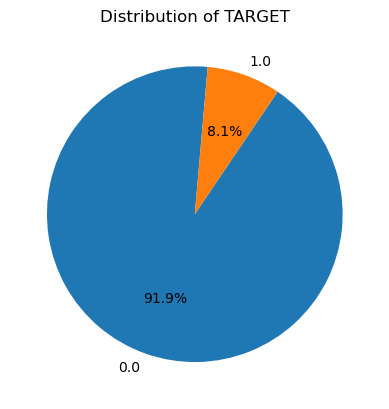

In [26]:
# Examining the distribution of the 'TARGET' column
target_distribution = train['TARGET'].value_counts()
print(target_distribution)
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', startangle=85)
plt.title('Distribution of TARGET')
plt.show()

**Insights:**

From the output, we observe that there are 282,686 instances where the loan was repaid (TARGET=0) and 24,825 instances where the loan was not repaid (TARGET=1).
This indicates a significant imbalance in the dataset: 91.9% of the loans were repaid on time, while only 8.07% were not. Such an imbalance can influence the performance of machine learning models, as they might become biased towards predicting the majority class.

So if we were to use a majority class classifier, the accuracy would be roughly 92%.

### Correlations with the Target Variable (with and without aggregations)

Exploring correlations between features and the target variable is a fundamental part of understanding the data. By calculating correlations we can gauge linear relationships between each variable and the target. Although the correlation coefficient might not fully capture the "relevance" of a feature, it provides insights into potential associations within the data

#### With aggregations

In [27]:
# Calculating correlations between all features and the target
correlations = app.corr()['TARGET'].sort_values()

top_positive = correlations.tail(10)
# Displaying the top 10 positive correlations
print('Most Positive Correlations:\n', top_positive)

top_negative = correlations.head(10)
# Displaying the top 10 negative correlations
print('\nMost Negative Correlations:\n', top_negative)

Most Positive Correlations:
 DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
CREDIT_ACTIVE_<lambda>         0.067128
DAYS_BIRTH                     0.078239
DAYS_CREDIT_mean               0.089729
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_1                           -0.201211
EXT_SOURCE_3                           -0.200453
EXT_SOURCE_2                           -0.160602
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
Name: TARGET, dtype: f

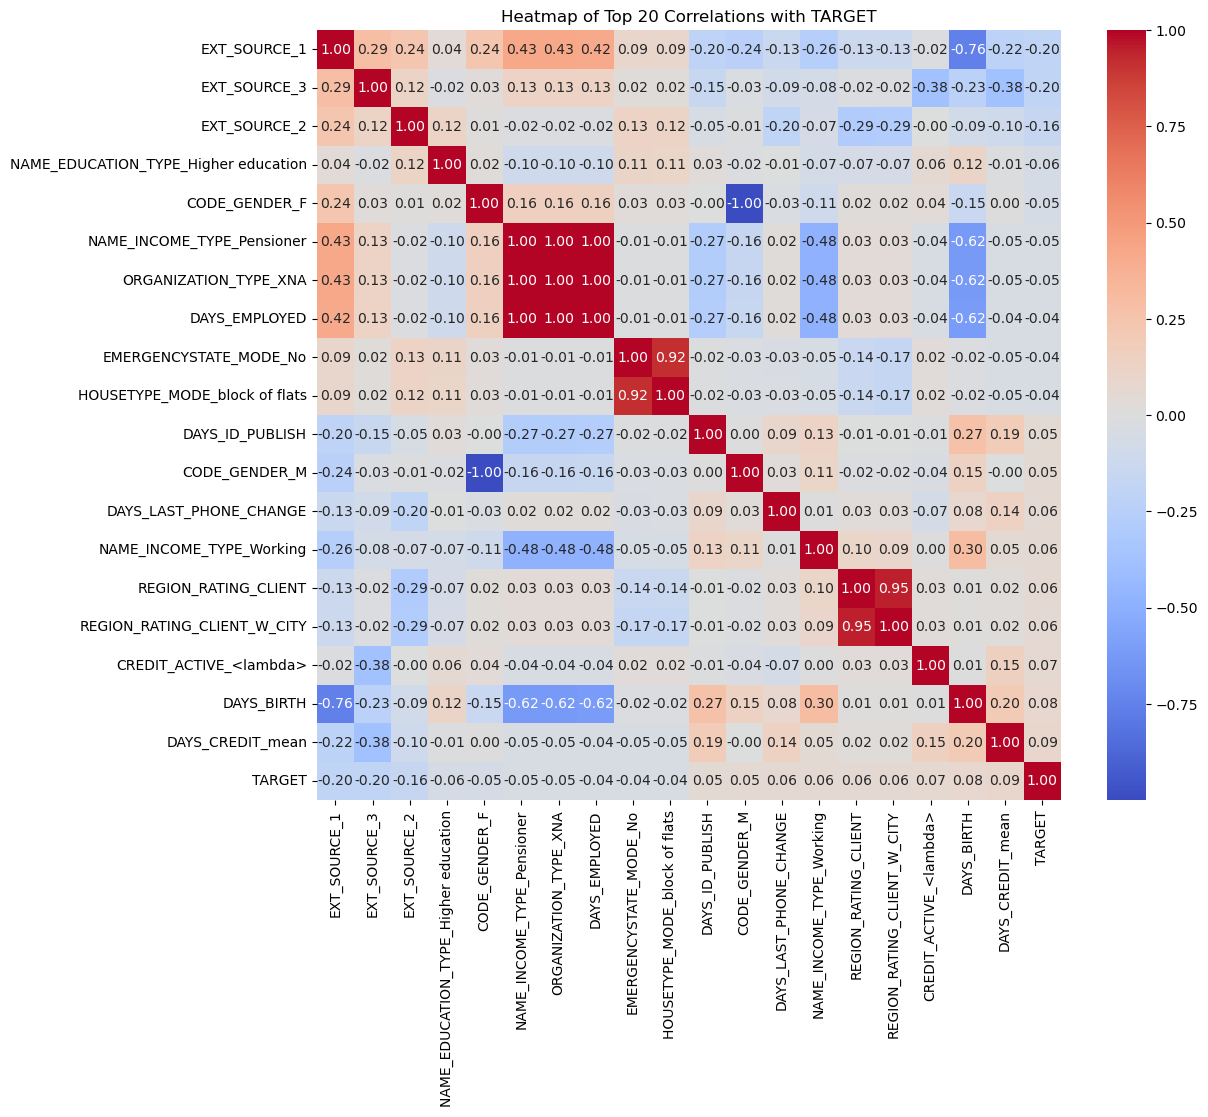

In [28]:
top_correlations = pd.concat([top_negative, top_positive])

# Filter the original correlation matrix to include only the top correlating features
filtered_corr_matrix = app[top_correlations.index].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Heatmap of Top 20 Correlations with TARGET')
plt.show()

Some columns that show promise are:
1. DAYS_CREDIT_mean
2. DAYS_BIRTH
3. REGION_RATING_CLIENT_W_CITY
4. EXT_SOURCE_1
5. NAME_EDUCATION_TYPE_Higher education
6. DAYS_EMPLOYED

#### Without aggregations

In [29]:
# Calculating correlations between all features and the target
correlations = train.corr()['TARGET'].sort_values()

top_positive = correlations.tail(10)
# Displaying the top 10 positive correlations
print('Most Positive Correlations:\n', top_positive)

top_negative = correlations.head(10)
# Displaying the top 10 negative correlations
print('\nMost Negative Correlations:\n', top_negative)

Most Positive Correlations:
 NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_1                           -0.201211
EXT_SOURCE_3                           -0.200453
EXT_SOURCE_2                           -0.160602
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.04620

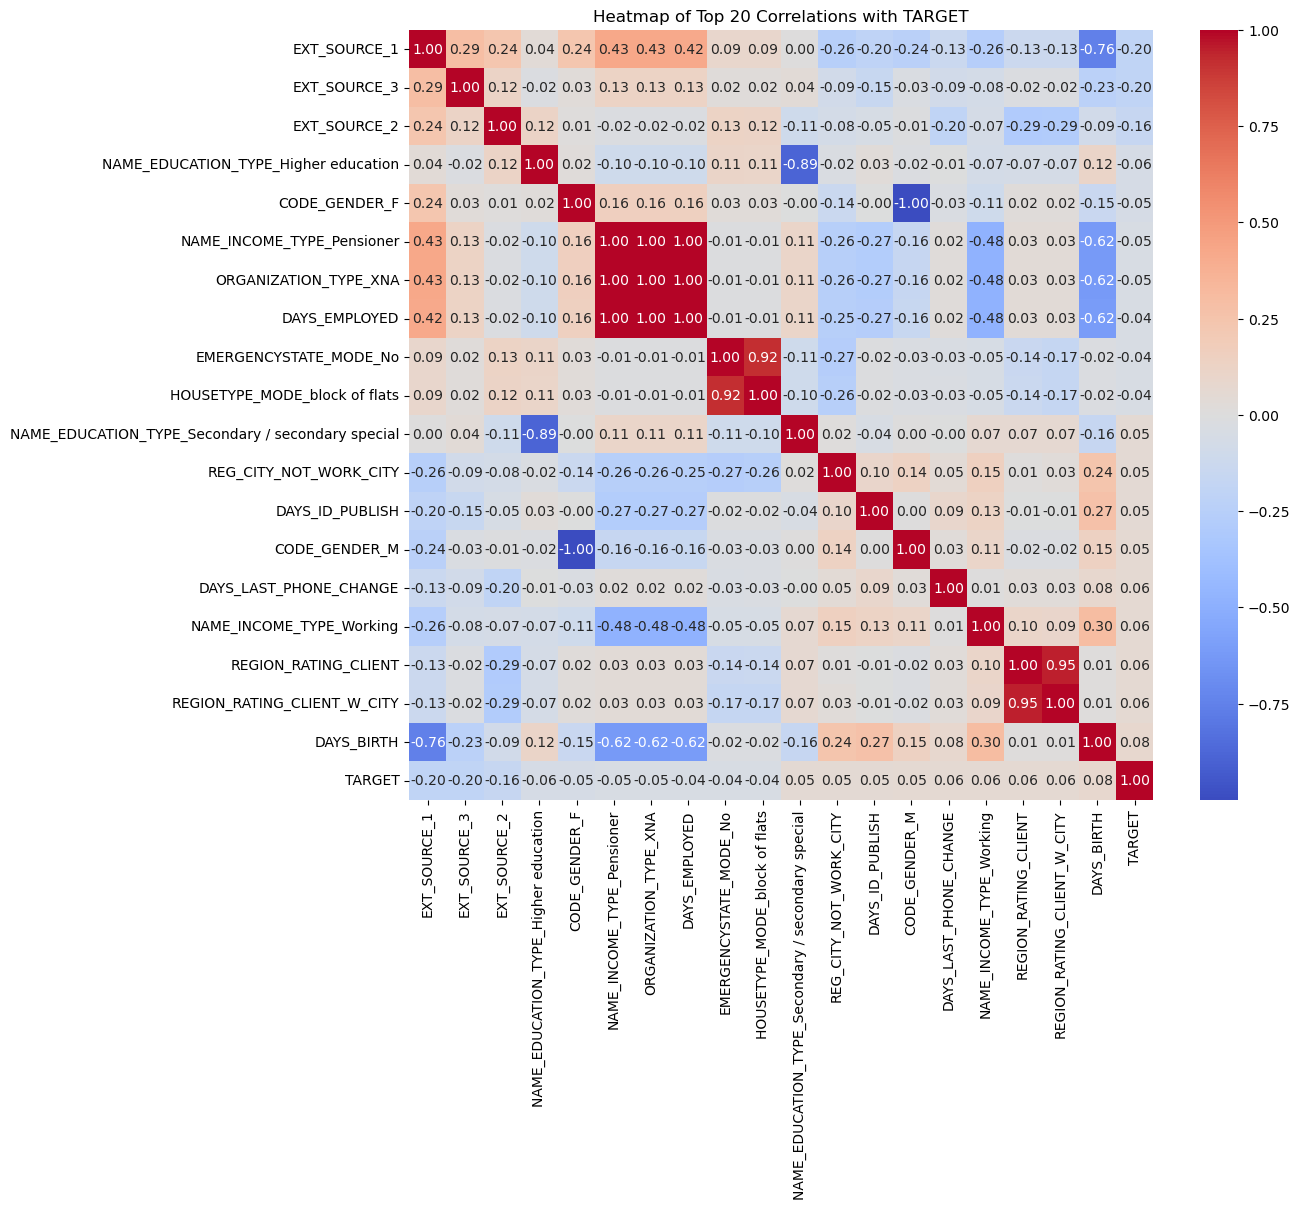

In [30]:
top_correlations = pd.concat([top_negative, top_positive])

# Filter the original correlation matrix to include only the top correlating features
filtered_corr_matrix = train[top_correlations.index].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Heatmap of Top 20 Correlations with TARGET')
plt.show()

Some columns that show promise are:
1. DAYS_BIRTH
2. REGION_RATING_CLIENT_W_CITY
3. DAYS_ID_PUBLISH
4. EXT_SOURCE_1
5. NAME_EDUCATION_TYPE_Higher education
6. DAYS_EMPLOYED

### Variance

In [31]:
# Calculate variance for each column
variances = app.var()

# Define a threshold for near zero variance
threshold = 0.01  # Adjust this value based on your specific needs

# Filter columns where the variance is below the threshold
near_zero_variance_columns = variances[variances < threshold].index


print("Columns with near zero variance:")
print(near_zero_variance_columns)

Columns with near zero variance:
Index(['REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       ...
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3', 'ORGANIZATION_TYPE_University',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=112)


So there appears to be 112 columns that contain near zero variances.

### Checking datatypes of columns

In [32]:
# Number of each type of column
train.dtypes.value_counts()

float64    231
Name: count, dtype: int64

In [33]:
test.dtypes.value_counts()

float64    227
Name: count, dtype: int64

In [34]:
bureau.dtypes.value_counts()

float64    8
int64      6
object     3
Name: count, dtype: int64

In [35]:
prev_app.dtypes.value_counts()

object     16
float64    15
int64       6
Name: count, dtype: int64

### Default Rates by Tenure

In [36]:
train['DAYS_EMPLOYED'] = abs(train['DAYS_EMPLOYED'])
train['DAYS_EMPLOYED'].corr(train['TARGET'])

-0.04704582521599294

In [37]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [38]:
# Separating the dataset into anomalies and non-anomalies based on 'DAYS_EMPLOYED'
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]

# Calculating and printing the percentage of loan defaults among non-anomalous and anomalous groups
print('The non-outliers default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The outliers default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))

# Printing the total number of anomalous entries
print('There are %d outlier values in the DAYS_EMPLOYED column' % len(anom))

The non-outliers default on 8.66% of loans
The outliers default on 5.40% of loans
There are 55374 outlier values in the DAYS_EMPLOYED column


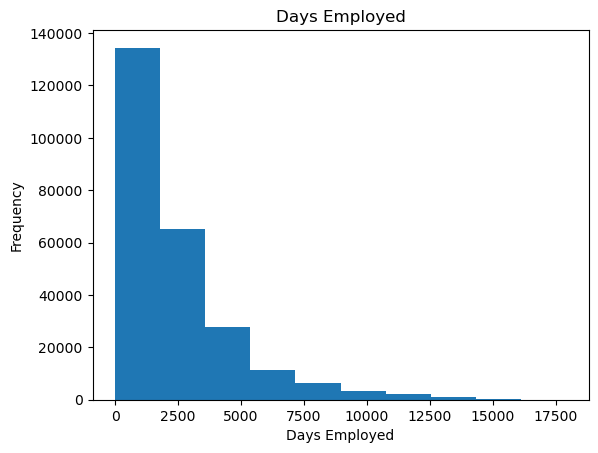

In [39]:
# Replacing anomalous values with NaN
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Plotting the histogram for 'DAYS_EMPLOYED' after replacing anomalies
train['DAYS_EMPLOYED'].plot.hist(title='Days Employed')
plt.xlabel('Days Employed')
plt.show()

In [40]:
print(train['DAYS_EMPLOYED'].describe())

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64


In [41]:
# Identifying the anomalies and replacing them
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Recalculate 'YEARS_EMPLOYED' after fixing anomalies
train['YEARS_EMPLOYED'] = abs(train['DAYS_EMPLOYED']) / 365
print(train['YEARS_EMPLOYED'].describe())

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64


In [42]:
bins = [0, 1, 3, 5, 10, 20, 30, 40, 50]  # Extending up to 50 years
labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '20-30', '30-40', '40+']
train['EMPLOYED_BIN'] = pd.cut(train['YEARS_EMPLOYED'], bins=bins, labels=labels, right=True)  # Include the right endpoint

print(train['EMPLOYED_BIN'].value_counts())

EMPLOYED_BIN
5-10     64872
1-3      61472
3-5      46857
10-20    38398
0-1      27980
20-30     9551
30-40     2771
40+        234
Name: count, dtype: int64


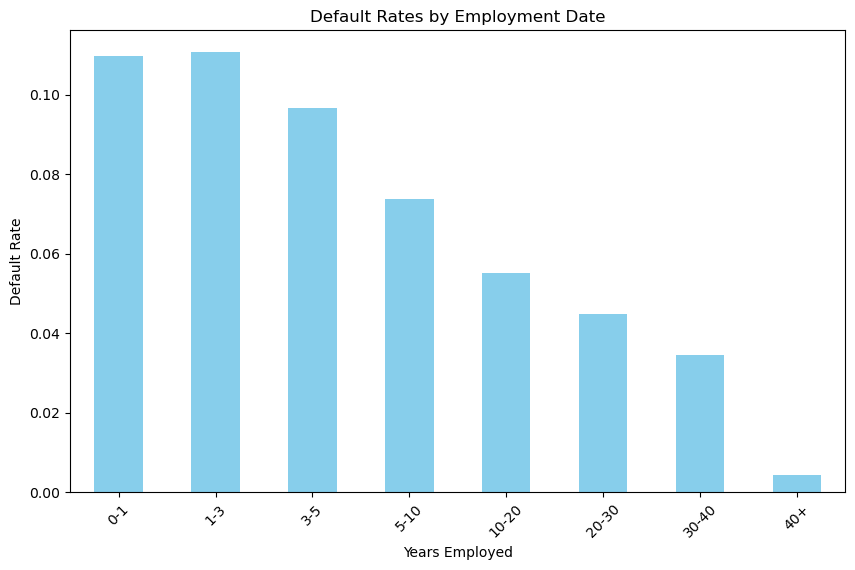

In [43]:
default_rate_by_bin = train.groupby('EMPLOYED_BIN')['TARGET'].mean()

# Plotting default rates by employment bins
default_rate_by_bin.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Default Rates by Employment Date')
plt.xlabel('Years Employed')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()

This negative relationship between Years Employed and our target variable is highlighted by not only the correlation coefficient (-0.07495845742543839) and graphically noticeable on the chart above. This analysis indicates that as the amount of tenure increases in a job, the less likely someone is to default on loans. So individuals who have worked for large portions of time may present a lower risk of default to lenders.

**Default Rates by Age**

In [44]:
# Find the correlation of the positive days since birth and target
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982709

The observation highlights a negative relationship between the age and the likelihood of defaulting on a loan. As age increases, they are more likely to repay their loans on time. This trend suggests that older clients may present a lower risk of default to lenders.

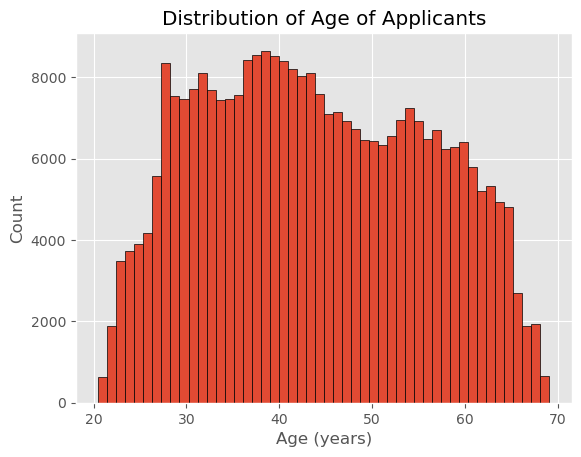

In [45]:
# Set the style of plots
plt.style.use('ggplot')
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].abs() / 365.25
# Plot the distribution of ages in years
plt.hist(train['DAYS_BIRTH'], edgecolor = 'k', bins = 50)
plt.title('Distribution of Age of Applicants')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [46]:
# Convert days to years and then categorize into age groups
train['YEARS_BIRTH'] = train['DAYS_BIRTH'].astype(int)
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
train['AGE_GROUP'] = pd.cut(train['YEARS_BIRTH'], bins=bins, labels=labels, right=False)

default_rate_by_age_group = train.groupby('AGE_GROUP')['TARGET'].mean()

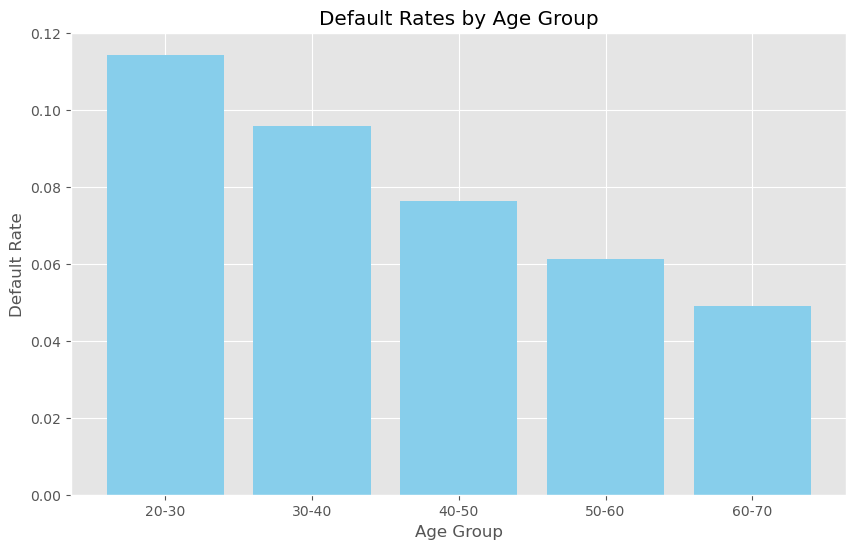

In [47]:
# Plotting with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(default_rate_by_age_group.index.astype(str), default_rate_by_age_group.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.title('Default Rates by Age Group')
plt.show()

This exploration is intuitive as younger borrowers don't typically have the financial stability that older borrowers would have after years of work. Additionally, younger borrowers may also have other debts on their hands that older borrowers would have already paid off(like student loans).

**Default Rate by Income**

In [48]:
# Find the correlation of the positive days since birth and target
train['AMT_INCOME_TOTAL'] = abs(train['AMT_INCOME_TOTAL'])
train['AMT_INCOME_TOTAL'].corr(train['TARGET'])

-0.003981865601205655

In [49]:
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, train['AMT_INCOME_TOTAL'].max()]
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-500k', '500k-1M', '1M+']

# Create a new column for income groups
train['INCOME_GROUP'] = pd.cut(train['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)

default_rate_by_income = train.groupby('INCOME_GROUP')['TARGET'].mean()

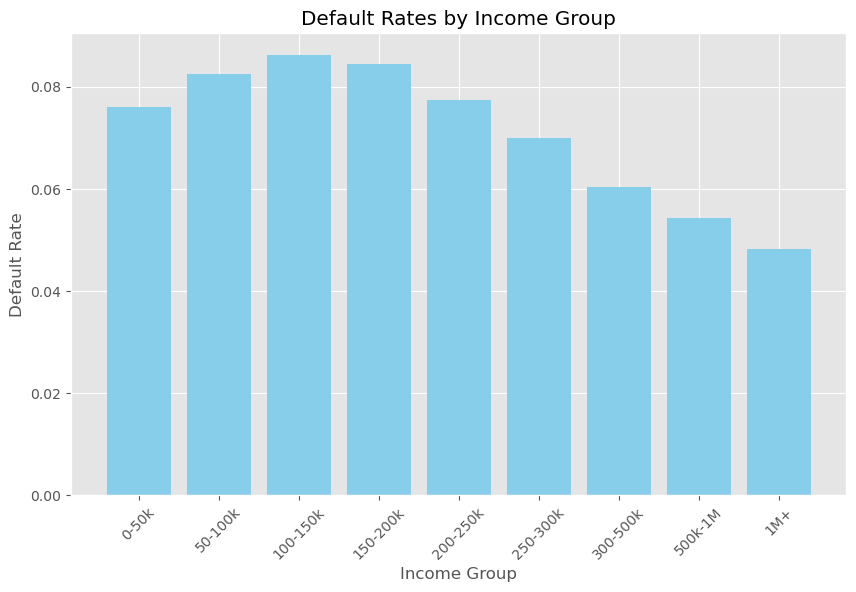

In [50]:
# Plotting the default rates by income group
plt.figure(figsize=(10, 6))
plt.bar(default_rate_by_income.index.astype(str), default_rate_by_income.values, color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Default Rate')
plt.title('Default Rates by Income Group')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

The naturally negative sloping nature of income is intuitive as having larger income typically correlates with a greater ability to pay the loans you take on. What's interesting is the increasing default rates from 0-150K, maybe that indicates a younger or larger portion of our data.

## Results section

In this project, we aimed to understand the dataset presented in order to understand how a predictive model can accurately identify potential loan defaulters. The dataset, which encompasses detailed records from multiple sources about applicants' credit history and loan applications, revealed a significant imbalance in the target variable. As 91.9% of loans were repaid on time. Another notable challenge was the extensive amount of missing data across both training and testing datasets, with columns on average showing 44.4% and 45.0% missing data respectively. To address this, we employed strategies such as removing columns and rows with excessive missing values and applying sophisticated imputation methods for the residual missing entries.

This EDA highlights several important features that could indicate default risk, including the age of the applicant and scores from external sources. Where both exhibit a negative correlation with the likelihood of default. This suggests that older applicants and those with higher external scores are generally more reliable borrowers. Following basic loan criteria standards, we also saw that as income increased past 150k and as tenure in your career also have negative relationships with our variable. These negative relationships indicate that as each of these factors increase, the likelihood of defaulting decreases.

After finishing this EDA, the major data problem is the external sources feature of the dataset. It is an ambigous score that really doesn't tell us anything and is generated from a third party. This EDA has influenced my thinking about my analytics approach by changing how I approach a problem. Not all problems are solved the same and performing the same analytic steps isn't always required or even sufficient. Thoroughly thinking through the business problem was key to helping me develop this EDA.